<a href="https://colab.research.google.com/github/othniel77/datascience/blob/main/two_sample_and_anova_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving repub_votes_potus_08_12.feather to repub_votes_potus_08_12.feather


# **Effectuer des tests t**

## **Problèmes à deux échantillons**
Comparer des exemples de statistiques sur des groupes d'une variable

converti_comp est une variable numérique

age_first_code_cut est une variable catégorielle avec des niveaux ( "enfant"et "adulte")

Les utilisateurs qui ont programmé pour la première fois lorsqu’ils étaient enfants sont-ils mieux rémunérés que ceux qui ont commencé à l’âge
adulte ?

## **Hypothèses**

H0: La rémunération moyenne (en USD) est le même pour ceux qui ont codé pour la première fois en tant qu’enfant et ceux qui ont codé pour la première fois en tant qu’adulte.

H0:µenfant=µadulte

H0:µenfant−µadulte=0

H1: La rémunération moyenne (en USD) estplus grandpour ceux qui ont codé pour la première fois en tant qu’enfant, par rapport à ceux qui ont codé pour la première fois en tant qu’adulte.

H1:µenfant>µadulte

H1:µenfant−µadulte>0


## **Calcul des statistiques récapitulatives par groupe**

In [ ]:
stack_overflow = pd.read_feather('/content/stack_overflow.feather')
stack_overflow.head()

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30
3,125.0,"I am not primarily a developer, but I write co...",Yes,41.0,30.0,adult,Monthly,200000.0,2000000.0,United States,...,Appropriate in length,No,None,None,None,Just as welcome now as I felt last year,40.0,11.0,11.0,At least 30
4,147.0,"I am not primarily a developer, but I write co...",No,28.0,15.0,adult,Yearly,50000.0,37816.0,Canada,...,Appropriate in length,No,"Another engineering discipline (such as civil,...",None,Express;Flask,Just as welcome now as I felt last year,40.0,5.0,3.0,Under 30


In [ ]:
stack_overflow.groupby('age_first_code_cut')['converted_comp'].mean()

age_first_code_cut
adult    111313.311047
child    132419.570621
Name: converted_comp, dtype: float64

## **Statistiques des tests**

La moyenne de l'échantillon estime la moyenne de la population

X- une moyenne d'échantillon

Xenfant-exemple de compensation moyenne pour avoir codé d'abord en tant qu'enfant

Xadulte-exemple de compensation moyenne pour avoir codé d'abord en tant qu'adulte

Xenfant−Xadulte-unstatistique de test

z-score - une statistique de test (standardisée)

## **Standardisation des statistiques de test**

## **Erreur standard**

s est l'écart type de la variable


n est la taille de l'échantillon (nombre d'observations/lignes dans l'échantillon)

## **En supposant que l'hypothèse nulle est vraie**

## **Calculs supposant que l'hypothèse nulle est vraie**

In [ ]:
xbar = stack_overflow.groupby('age_first_code_cut')['converted_comp'].mean()
xbar

age_first_code_cut
adult    111313.311047
child    132419.570621
Name: converted_comp, dtype: float64

In [ ]:
s = stack_overflow.groupby('age_first_code_cut')['converted_comp'].std()
s

age_first_code_cut
adult    271546.521729
child    255585.240115
Name: converted_comp, dtype: float64

In [ ]:
n = stack_overflow.groupby('age_first_code_cut')['converted_comp'].count()
n

age_first_code_cut
adult    1376
child     885
Name: converted_comp, dtype: int64

## **Calcul de la statistique du test**

In [ ]:
prop_child_samp = (stack_overflow['age_first_code_cut'] == "child").mean()

In [ ]:
xbar_child = stack_overflow.groupby('age_first_code_cut')['converted_comp'].get_group('child').mean()
xbar_child
xbar_adult = stack_overflow.groupby('age_first_code_cut')['converted_comp'].get_group('adult').mean()
xbar_adult

111313.31104651163

In [ ]:
s_child = stack_overflow.groupby('age_first_code_cut')['converted_comp'].get_group('child').std()
s_child
s_adult = stack_overflow.groupby('age_first_code_cut')['converted_comp'].get_group('adult').std()
s_adult

271546.5217287419

In [ ]:
n_child = stack_overflow.groupby('age_first_code_cut')['converted_comp'].get_group('child').count()
n_child
n_adult = stack_overflow.groupby('age_first_code_cut')['converted_comp'].get_group('adult').count()
n_adult

1376

In [ ]:
import numpy as np
numerator = xbar_child - xbar_adult
denominator = np.sqrt(s_child ** 2 / n_child + s_adult ** 2 / n_adult)
t_stat = numerator / denominator
t_stat

1.869931331622183

# **Calcul des p value à partir des statistiques T**

## **distributions t**

la statistique t suit une distribution t

A un paramètre nommé degrés de liberté, ou df

il ressemble à des distributions normales, avec des queues plus
grosses


# **Degrés de liberté**

Degrés de liberté plus grands→La distribution t se rapproche de la distribution normale

Distribution normale→distribution t avec df infini

Degrés de liberté : nombre maximum de valeurs logiquement indépendantes dans l'échantillon de données

## **Hypothèses**

H0: La rémunération moyenne (en USD) est le même pour ceux qui ont codé en premier en tant qu’enfant et ceux qui ont codé en premier en tant qu’adulte

H1: La rémunération moyenne (en USD) est plus grand pour ceux qui ont codé pour la première fois en tant qu'enfant, par rapport à ceux qui ont codé pour la première fois en tant qu'adulte

Utiliser un test à droite

## **Calcul des valeurs p : deux moyennes de groupes différents**


In [ ]:
numerator = xbar_child - xbar_adult
denominator = np.sqrt(s_child ** 2 / n_child + s_adult ** 2 / n_adult)
t_stat = numerator / denominator

In [ ]:
degrees_of_freedom = n_child + n_adult - 2
degrees_of_freedom

2259

Utiliser le CDF de distribution t et non le CDF normal

In [ ]:
from scipy.stats import t
1 - t.cdf(t_stat, df= degrees_of_freedom)

0.030811302165157706

Preuve que les data scientists de Stack Overflow qui ont commencé à coder lorsqu'ils étaient enfants gagnent plus.


# **Tests t appariés**

### **Ensemble de données sur les présidents républicains américains**

## **De deux échantillons à un**

In [ ]:
repub_votes_potus_08_12 = pd.read_feather('/content/repub_votes_potus_08_12.feather')
print(repub_votes_potus_08_12.head())

        state   county  repub_percent_08  repub_percent_12
0     Alabama     Hale         38.957877         37.139882
1    Arkansas   Nevada         56.726272         58.983452
2  California     Lake         38.896719         39.331367
3  California  Ventura         42.923190         45.250693
4    Colorado  Lincoln         74.522569         73.764757


In [ ]:
sample_data = repub_votes_potus_08_12
sample_data['diff'] = sample_data['repub_percent_08'] - sample_data['repub_percent_12']

<Axes: >

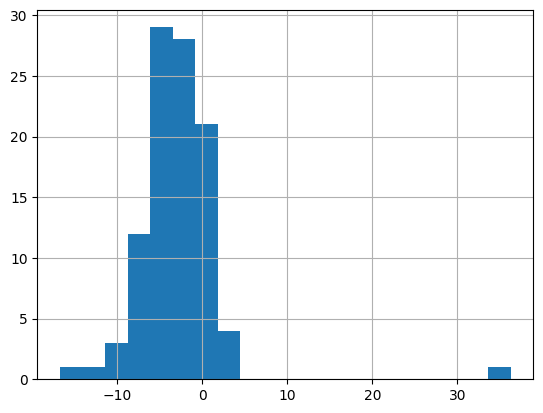

In [ ]:
import matplotlib.pyplot as plt

sample_data['diff'].hist(bins=20)


## **Calculer des exemples de statistiques de la différence**

In [ ]:
xbar_diff = sample_data['diff'].mean()

## **Calcul de la valeur p**

In [ ]:
n_diff = len(sample_data)

In [ ]:
s_diff = sample_data['diff'].std()


In [ ]:
t_stat = (xbar_diff-0) / np.sqrt(s_diff**2/n_diff)

In [ ]:
degrees_of_freedom = n_diff - 1

In [ ]:
from scipy.stats import t
p_value = t.cdf(t_stat, df=n_diff-1)
p_value

9.572537285272411e-08

## **Tester les différences entre deux moyennes en utilisant ttest()**

In [ ]:


!pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 1.6 MB/s eta 0:00:00


In [ ]:
import pingouin

In [ ]:
pingouin.ttest(x=sample_data['diff'],y=0,alternative="less")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.560104,1.323e+05,0.999955


## **ttest() avec paired=True**

In [ ]:
pingouin.ttest(x=sample_data['repub_percent_08'],y=sample_data['repub_percent_12'],paired=True,alternative="less")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.217364,1.323e+05,0.696338


## **Test non apparié()**


In [ ]:
pingouin.ttest(x=sample_data['repub_percent_08'],y=sample_data['repub_percent_12'],paired=False, alternative="less")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.536997,198,less,0.062945,"[-inf, 0.22]",0.217364,0.927,0.454972


# **Tests ANOVA**

## **Satisfaction au travail : 5 catégories**

In [ ]:
stack_overflow['job_sat'].value_counts()


Very satisfied           879
Slightly satisfied       680
Slightly dissatisfied    342
Neither                  201
Very dissatisfied        159
Name: job_sat, dtype: int64

## **Visualiser plusieurs distributions**


La rémunération annuelle moyenne est-elle différente selon les
différents niveaux de satisfaction au travail ?

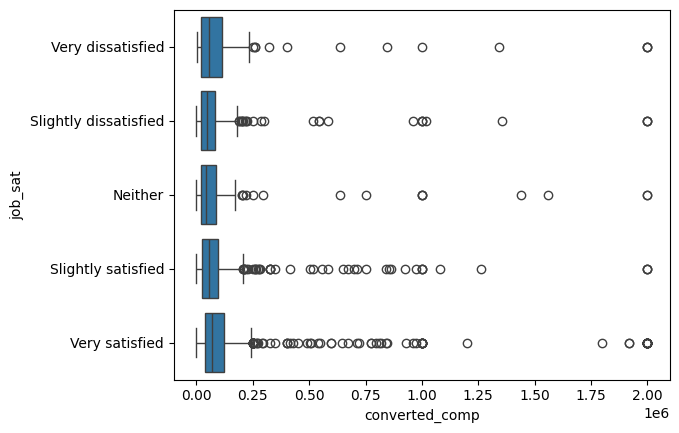

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="converted_comp",y="job_sat",data=stack_overflow)
plt.show()


# **Analyse de variance (ANOVA)**

# **Un test de différences entre groupes**

In [ ]:
alpha = 0.2
pingouin.anova(data=stack_overflow,dv="converted_comp",between="job_sat")


,Source,ddof1,ddof2,F,p-unc,np2
0,job_sat,4,2256,4.480485,0.001315,0.007882


## **paires_tests()**


In [ ]:
pingouin.pairwise_tests(data=stack_overflow,dv="converted_comp",between="job_sat",padjust="none")

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,158.564,-0.192931
1,job_sat,Slightly satisfied,Neither,False,True,-0.700752,258.204546,two-sided,0.484088,0.114,-0.068513
2,job_sat,Slightly satisfied,Very dissatisfied,False,True,-1.243665,187.153329,two-sided,0.215179,0.208,-0.145624
3,job_sat,Slightly satisfied,Slightly dissatisfied,False,True,-0.038264,569.926329,two-sided,0.969491,0.074,-0.002719
4,job_sat,Very satisfied,Neither,False,True,1.662901,328.326639,two-sided,0.097286,0.337,0.120115
5,job_sat,Very satisfied,Very dissatisfied,False,True,0.747379,221.666205,two-sided,0.455627,0.126,0.063479
6,job_sat,Very satisfied,Slightly dissatisfied,False,True,3.076222,821.303063,two-sided,0.002166,7.43,0.173247
7,job_sat,Neither,Very dissatisfied,False,True,-0.545948,321.165726,two-sided,0.585481,0.135,-0.058537
8,job_sat,Neither,Slightly dissatisfied,False,True,0.602209,367.730081,two-sided,0.547406,0.118,0.055707
9,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,0.197,0.119131


**Correction de Bonferroni**


In [ ]:
pingouin.pairwise_tests(data=stack_overflow,dv="converted_comp",between="job_sat",padjust="bonf")


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,job_sat,Slightly satisfied,Very satisfied,False,True,-4.009935,1478.622799,two-sided,0.000064,0.000638,bonf,158.564,-0.192931
1,job_sat,Slightly satisfied,Neither,False,True,-0.700752,258.204546,two-sided,0.484088,1.000000,bonf,0.114,-0.068513
2,job_sat,Slightly satisfied,Very dissatisfied,False,True,-1.243665,187.153329,two-sided,0.215179,1.000000,bonf,0.208,-0.145624
3,job_sat,Slightly satisfied,Slightly dissatisfied,False,True,-0.038264,569.926329,two-sided,0.969491,1.000000,bonf,0.074,-0.002719
4,job_sat,Very satisfied,Neither,False,True,1.662901,328.326639,two-sided,0.097286,0.972864,bonf,0.337,0.120115
5,job_sat,Very satisfied,Very dissatisfied,False,True,0.747379,221.666205,two-sided,0.455627,1.000000,bonf,0.126,0.063479
6,job_sat,Very satisfied,Slightly dissatisfied,False,True,3.076222,821.303063,two-sided,0.002166,0.021659,bonf,7.43,0.173247
7,job_sat,Neither,Very dissatisfied,False,True,-0.545948,321.165726,two-sided,0.585481,1.000000,bonf,0.135,-0.058537
8,job_sat,Neither,Slightly dissatisfied,False,True,0.602209,367.730081,two-sided,0.547406,1.000000,bonf,0.118,0.055707
9,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.129951,247.570187,two-sided,0.259590,1.000000,bonf,0.197,0.119131


 Après application de l’ajustement de Bonferroni, les valeurs de p pour les tests t entre chacun des trois groupes sont toutes inférieures à 0,1.